<div align="center">
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=350>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=350>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png">
    </picture>
    </a>
    <br>
    <br>
    <a href="https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/JOIN US ON SLACK-4A154B?style=for-the-badge&logo=slack&logoColor=white" alt="Logo">
    </a>
    <a href="https://visual-layer.readme.io/discuss" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/DISCUSSION%20FORUM-slateblue?style=for-the-badge&logo=discourse&logoWidth=20" alt="Logo">
    </a>
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="Logo">
    </a>
    <a href="https://twitter.com/visual_layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white" alt="Logo">
    </a>
    <a href="https://www.youtube.com/@visual-layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/-YouTube-black.svg?style=for-the-badge&logo=youtube&colorB=red" alt="Logo">
    </a>
</div>

# Analyze Tensorflow Datasets

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=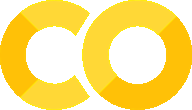&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-tensorflow-datasets.ipynb)
[![Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=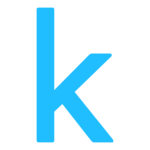&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-tensorflow-datasets.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/analyzing-tensorflow-datasets)

This notebook shows how you can analyze [Tensorflow Datasets](https://www.tensorflow.org/datasets) for issues using fastdup.

## Installation

First, let's install the necessary packages.

In [1]:
!pip install -Uq fastdup tensorflow-datasets protobuf==3.20.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.14.1 requires protobuf>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
paddlepaddle 2.5.0 requires protobuf>=3.20.2; platform_system != "Windows", but you have protobuf 3.20.0 which is incompatible.
tensorflow 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.
tf2onnx 1.15.1 requires protobuf~=3.20.2, but you have protobuf 3.20.0 which is incompatible.


Now, test the installation. If there's no error message, we are ready to go.

In [6]:
import fastdup
fastdup.__version__

'1.43'

## Download Dataset

In [2]:
import tensorflow_datasets as tfds
import os
from PIL import Image

dataset_name = "caltech101"
dataset = tfds.load(dataset_name, split="train[:80%]")

2023-09-21 23:37:22.938775: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-21 23:37:22.957186: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-21 23:37:23.085681: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-21 23:37:23.086473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 23:37:23.734668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Convert Dataset to Images
The downloaded dataset are in binary format. Let's convert them into images and save the in our local directory.

The resulting directory should look like this

```
caltech101/
    ├── accordion
    |    ├── 0001.jpg
    |    └── 0002.jpg
    ├── airplanes
    ├── bass
    ├── beaver
    ├── bonsai
    ├── pagoda
    ├── ..
    ├── ..
    ├── ..
    └── yin_yang
```

In [3]:
# Retrieve the label names from the dataset metadata
builder = tfds.builder(dataset_name)
label_names = builder.info.features['label'].names

# Create folders using the ImageNet convention
root_dir = "caltech101/"
os.makedirs(root_dir, exist_ok=True)

# Initialize counter variable
counter = 0

for data in dataset:
    image, label = data['image'], data['label']
    label_name = label_names[label]
    label_dir = os.path.join(root_dir, label_name)
    os.makedirs(label_dir, exist_ok=True)

    # Save image in its respective folder
    image_file = f"{counter:08}.jpg"  # Use counter variable to generate unique file names
    image_path = os.path.join(label_dir, image_file)
    image_pil = Image.fromarray(image.numpy())
    image_pil.save(image_path)

    # Increment counter variable
    counter += 1


## Construct Annotation DataFrame
fastdup expects the annotations of the dataset to be in a certain dataframe format.

In [4]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

,filename,label,split
0,caltech101/dragonfly/00000712.jpg,dragonfly,train
1,caltech101/dragonfly/00000377.jpg,dragonfly,train
2,caltech101/dragonfly/00001520.jpg,dragonfly,train
3,caltech101/dragonfly/00001905.jpg,dragonfly,train
4,caltech101/dragonfly/00001356.jpg,dragonfly,train
...,...,...,...
2443,caltech101/lamp/00002235.jpg,lamp,train
2444,caltech101/lamp/00000912.jpg,lamp,train
2445,caltech101/lamp/00001829.jpg,lamp,train
2446,caltech101/lamp/00000188.jpg,lamp,train


## Run fastdup
One the dataset download completes, analyze the image folder where the dataset is stored.

In [8]:
fd = fastdup.create(input_dir="caltech101/")
fd.run(annotations=df)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
                                                                                                 
               :++.                                                  ...                                       
             ;&&$+.                               ;x:                ;;;                                       
            .$&+                                  X&x                ;;;                                       
           X$&&&$$;    :$&&$+. ;$x    .x&&&X:   ;$&&&$$$:    :;;;;:. ;;;  :;;.      .;;.  :;;  :;;;;;.         
           +x&&Xxx: :$&&Xx++X&&$&$  .&&$+;+$&&; :x&&$xxx: .;;;;;:;;;;;;;  :;;.      .;;:  :;;;;;;:;;;;;:       
            .$&;   :$&X       +&&$  ;&$.    ;XX   X&x    .;;;       ;;;;  :;;.      .;;:  :;;;.      :;;:      
            .$&;   +&&.        x&$  .$&&$+.       X&x    ;;;         ;;;  :;;.      .;;:  :;;.        ;;;      
            .$&;   +&&.        x&$     ;X&&

0

## View Galleries

You can use all of fastdup gallery methods to view duplicates, clusters, etc.

stegosaurus


Generating gallery:   0%|          | 0/14 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.3
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



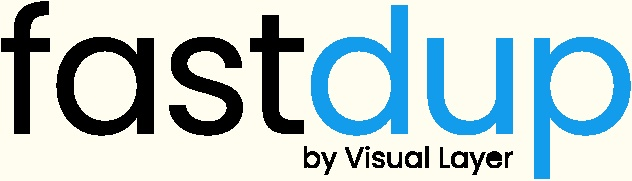
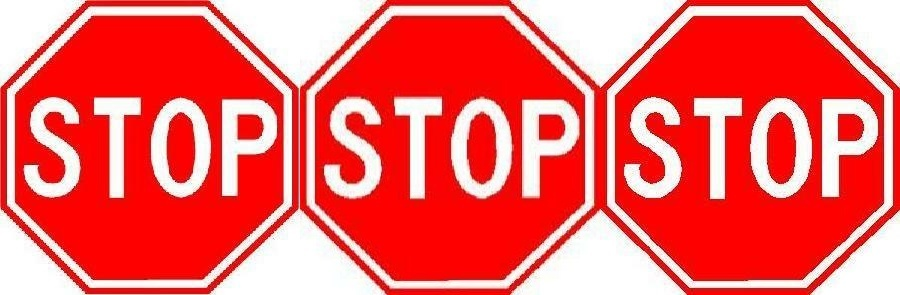
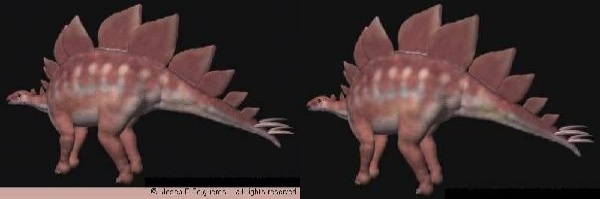
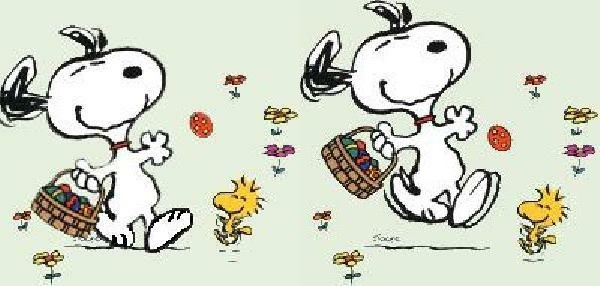
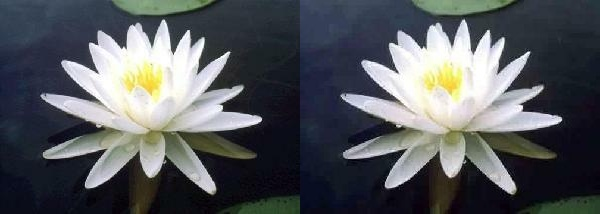
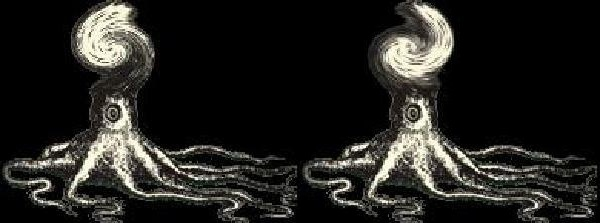
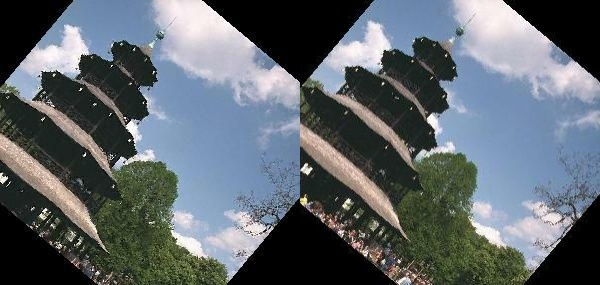
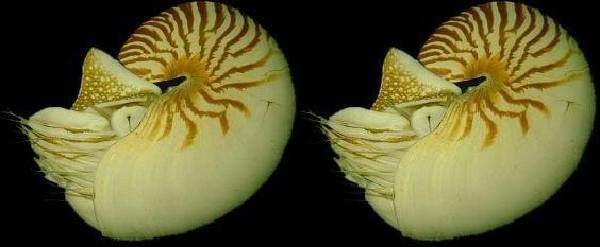
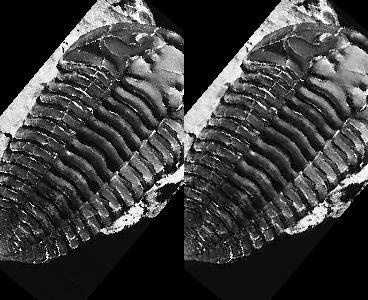
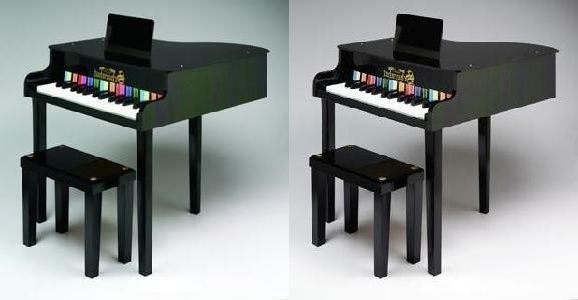
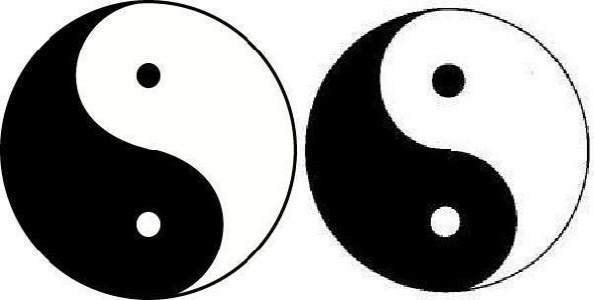
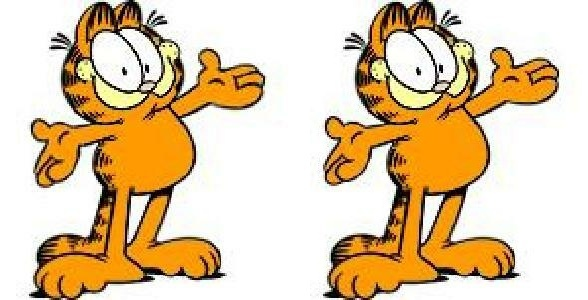
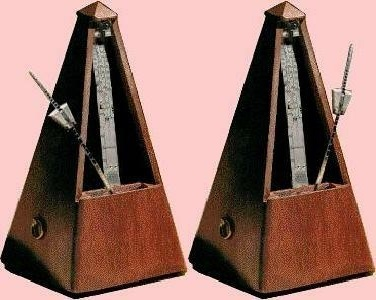
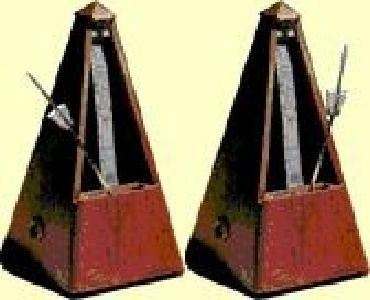
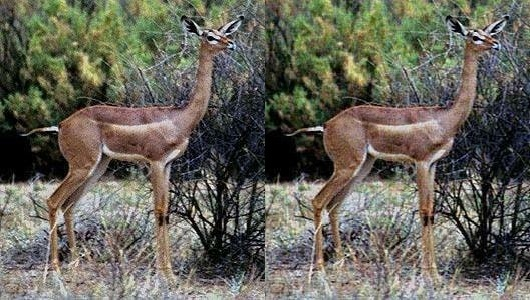

0

In [9]:
fd.vis.component_gallery()

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



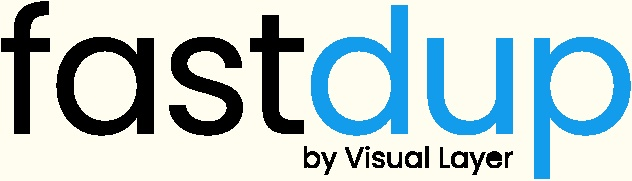
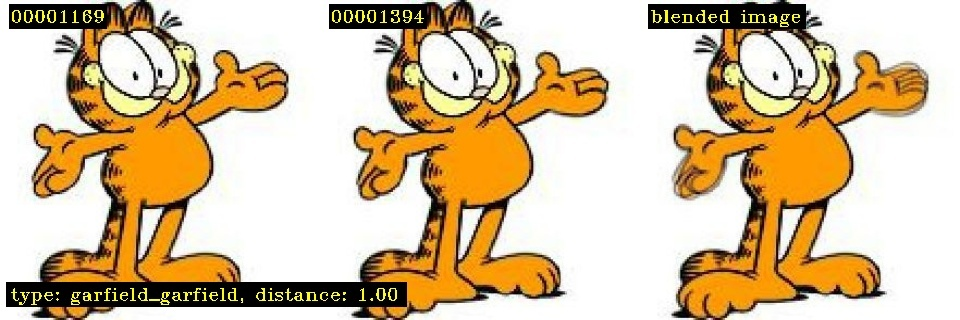
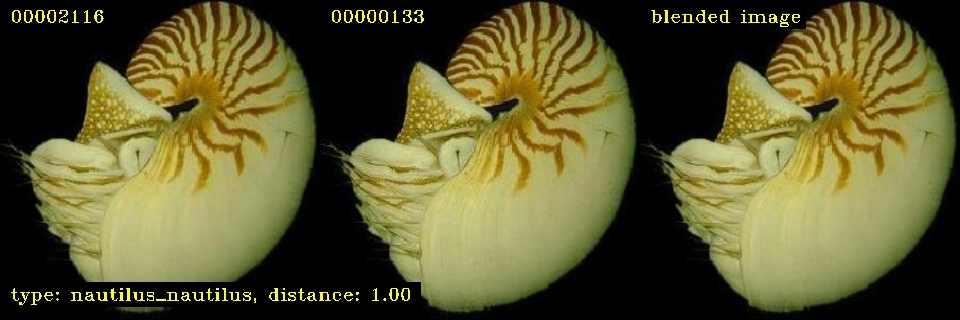
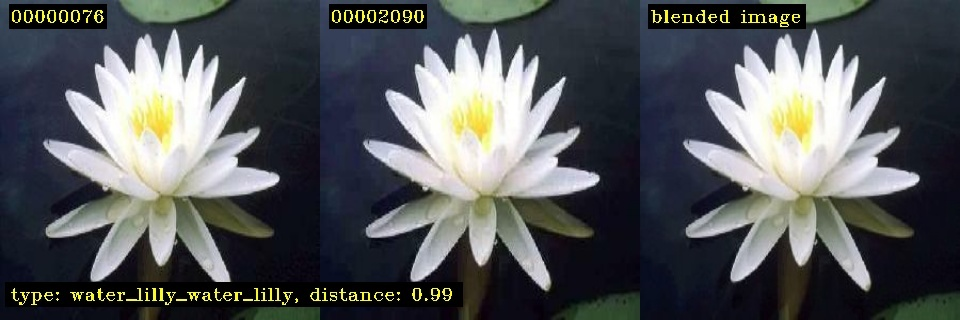
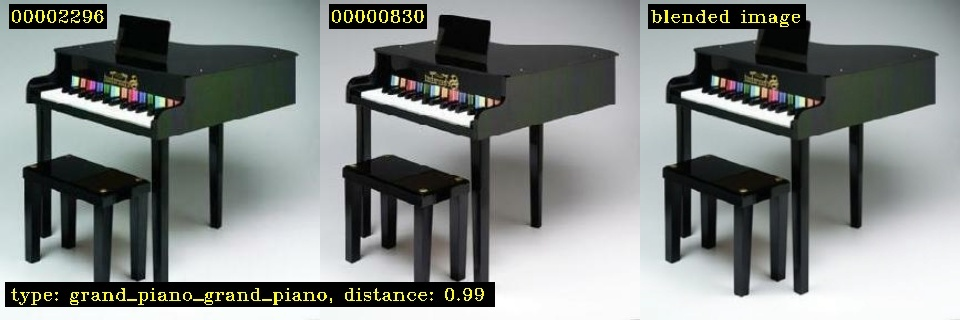
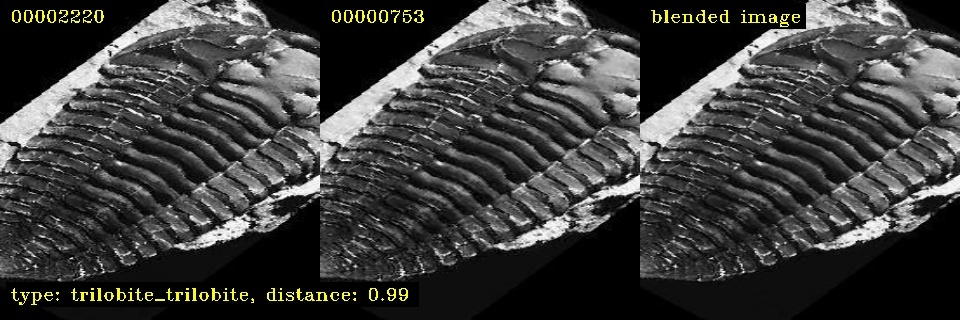
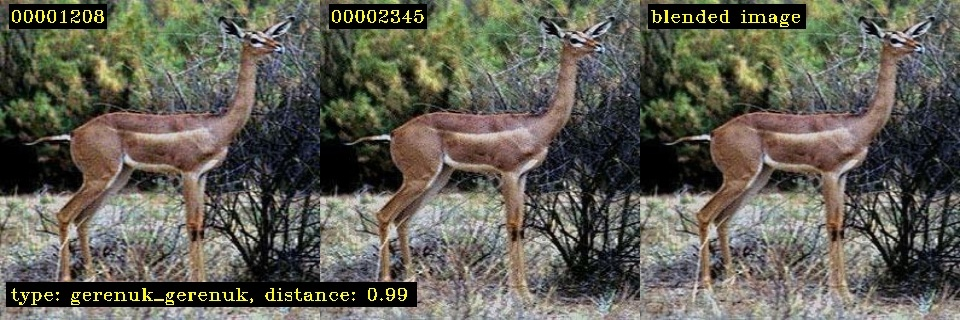
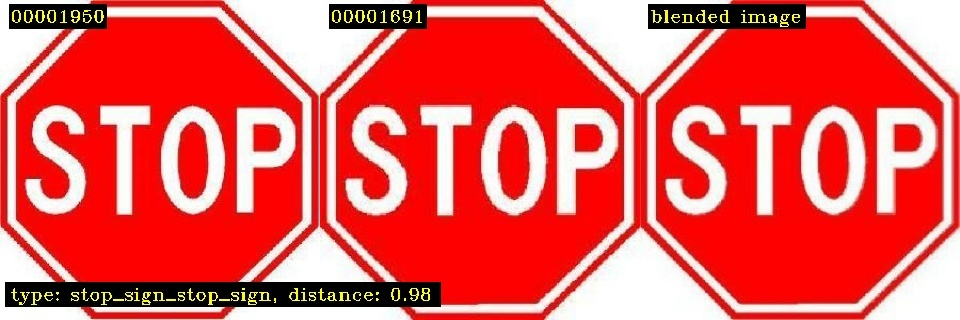
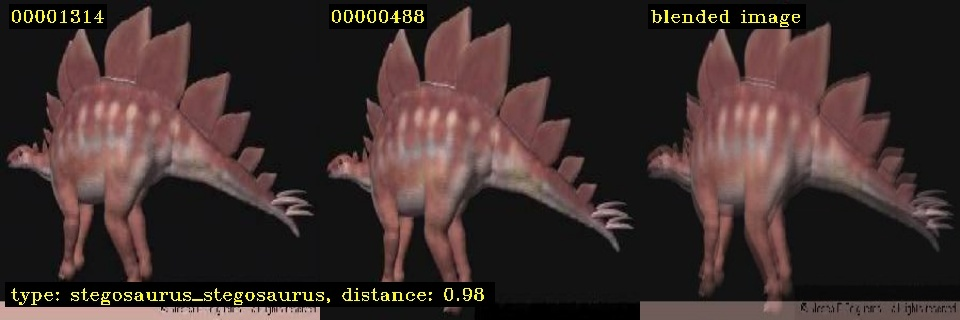
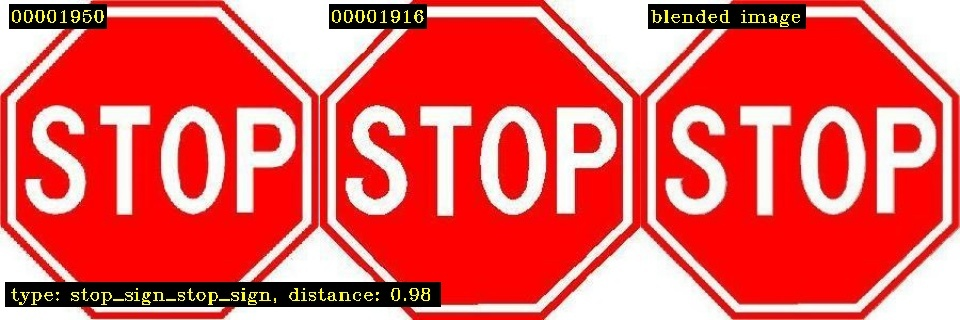
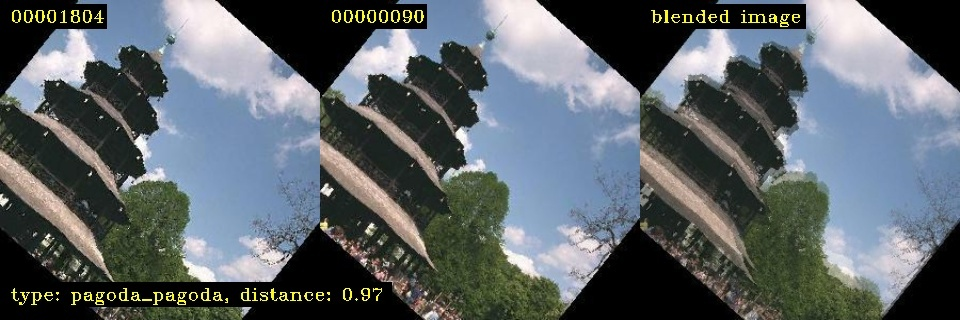

0

In [10]:
fd.vis.duplicates_gallery()

## Wrap Up
In this tutorial, we showed how you can analyze datasets from Tensorflow Datasets using fastdup.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try.


## VL Profiler - A faster and easier way to diagnose and visualize dataset issues

If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

VL Profiler is free to get started. Upload up to 1,000,000 images for analysis at zero cost!

[Sign up](https://app.visual-layer.com) now.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/github_banner_profiler.gif)](https://app.visual-layer.com)

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).

<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://visual-layer.slack.com/" target="_blank" style="text-decoration: none;"> Join Slack Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>

<center> 
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" style="text-decoration: none;"> LinkedIn </a> •
    <a href="https://twitter.com/visual_layer" target="_blank" style="text-decoration: none;"> Twitter </a>
</center>